# Utilities for large scale climate data analysis
The `xarrayutils.utils` module contains several functions that have proven useful in several of my day to day projects with both observational and model data.

## Linear regression
One of the operations many scientists do is calculating a linear trend along a specified dimension (e.g. time) on each grid point of a dataset. `linear_trend` makes this very easy. For demonstration purposes lets load some monthly gridded Argo data from [APDRC](http://apdrc.soest.hawaii.edu/dods/public_data/Argo_Products/monthly_mean/monthly_mixed_layer.info)

In [1]:
import xarray as xr
import numpy as np

%matplotlib inline

In [2]:
path = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/Argo_Products/monthly_mean/monthly_mixed_layer'
ds = xr.open_dataset(path, use_cftime=True)
ds

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, time: 240)
Coordinates:
  * time     (time) object 2001-01-15 00:00:00 ... 2020-12-15 00:00:00
  * lat      (lat) float64 -88.5 -85.5 -82.5 -79.5 -76.5 ... 79.5 82.5 85.5 88.5
  * lon      (lon) float64 1.5 4.5 7.5 10.5 13.5 ... 349.5 352.5 355.5 358.5
Data variables:
    mld      (time, lat, lon) float32 ...
    smld     (time, lat, lon) float32 ...
    nmld     (time, lat, lon) float32 ...
    ild      (time, lat, lon) float32 ...
    sild     (time, lat, lon) float32 ...
    nild     (time, lat, lon) float32 ...
    ttd      (time, lat, lon) float32 ...
    sttd     (time, lat, lon) float32 ...
    nttd     (time, lat, lon) float32 ...
    blt      (time, lat, lon) float32 ...
    sblt     (time, lat, lon) float32 ...
    nblt     (time, lat, lon) float32 ...
    tid      (time, lat, lon) float32 ...
    stid     (time, lat, lon) float32 ...
    ntid     (time, lat, lon) float32 ...
    mlt      (time, lat, lon) float32 ...
    smlt     (time, lat, lon) float32 ...
    nmlt     (time, lat, lon) float32 ...
    mls      (time, lat, lon) float32 ...
    smls     (time, lat, lon) float32 ...
    nmls     (time, lat, lon) float32 ...
Attributes:
    title:          3x3 bin-averaged Mixed Layer Monthly mean (from 2001)
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/projects/Argo/index.html
    history:        Fri Jun 05 09:22:38 HST 2020 : imported by GrADS Data Ser...

Lets find out how much the salinity in each grid point changed over the full period (20 years)

In [3]:
from xarrayutils.utils import linear_trend

In [4]:
# create an array 
salinity_regressed = linear_trend(ds.mls, 'time')
salinity_regressed

/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


<xarray.Dataset>
Dimensions:    (lat: 60, lon: 120)
Coordinates:
  * lat        (lat) float64 -88.5 -85.5 -82.5 -79.5 ... 79.5 82.5 85.5 88.5
  * lon        (lon) float64 1.5 4.5 7.5 10.5 13.5 ... 349.5 352.5 355.5 358.5
Data variables:
    slope      (lat, lon) float64 nan nan nan nan ... 0.08067 0.07533 -0.005028
    intercept  (lat, lon) float64 nan nan nan nan ... 20.33 22.07 22.88 32.38
    r_value    (lat, lon) float64 nan nan nan nan nan ... 1.0 0.9608 1.0 -0.116
    p_value    (lat, lon) float64 nan nan nan nan nan ... nan 0.03919 nan 0.884
    std_err    (lat, lon) float64 nan nan nan nan ... 0.0 0.01646 0.0 0.03045

Now we can plot the slope as a map

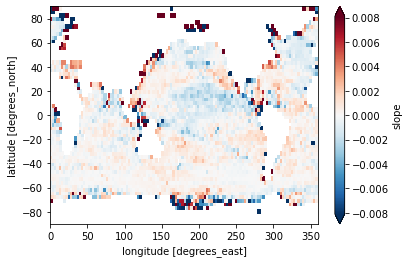

In [5]:
salinity_regressed.slope.plot(robust=True)

`linear_trend` converts the dimension over which to integrate into logical indicies, so the units of the plot above are (salinity/timestep of the original product), so here PSS/month.

## Correlation maps

But what about a bit more complex task? Lets find out how mixedlayer salinity and temperature correlate. For this we use `xr_linregress` (for which `linear_trend` is just a thin wrapper):

In [6]:
from xarrayutils.utils import linear_trend, xr_linregress

In [7]:
tempxsalt = xr_linregress(ds.mlt, ds.mls, dim='time')

/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


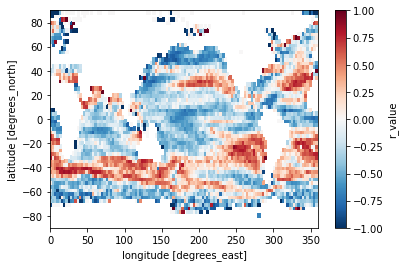

In [8]:
tempxsalt.r_value.plot()

This works in any dimension the dataset has:

In [9]:
tempxsalt = xr_linregress(ds.mlt, ds.mls, dim='lon')

/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/xarray/core/computation.py:700: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


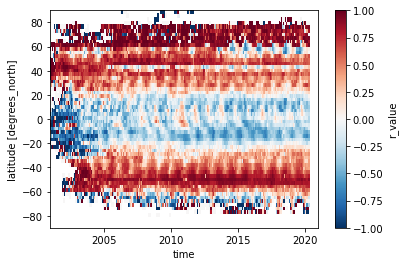

In [10]:
tempxsalt.r_value.plot(x='time')

This map shows that in lower latitudes spatial patterns of salinity are generally anticorrlated with temperature and vice versa in the high latitudes.

## Hatch sign agreement

It can often be useful to indicate if the sign along an averaged (or otherwise aggregated) dimension. For instance to show if forced changes have a consistent sign in reference to a multi-member mean. `sign_agreement` makes this easy. Consider this synthetic example:

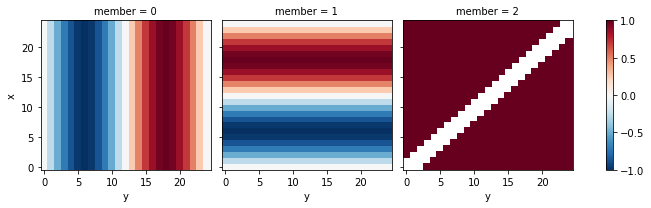

In [29]:
x = np.linspace(-np.pi, np.pi, 25)
y = np.linspace(-np.pi, np.pi, 25)
xx, yy = np.meshgrid(x,y)

data1 = np.sin(xx)
data2 = np.sin(yy)
data3 = np.ones_like(xx)

np.fill_diagonal(data3,np.nan)
np.fill_diagonal(data3[1:],np.nan)
np.fill_diagonal(data3[:,1:],np.nan)
np.fill_diagonal(data3[:,2:],np.nan)

da = xr.DataArray(np.array([data1, data2, data3]), dims=['member','x', 'y'])

da.plot(col='member')

Taking the mean of these fields, suggests that values increase in the upper-left, upper-right, lower-right quadrant, and the missing values in the third layer distort the mean.

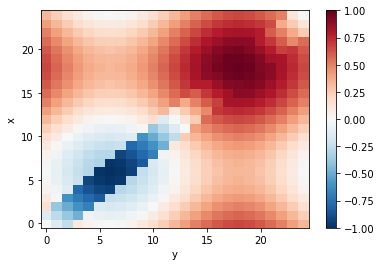

In [32]:
da.mean('member').plot()

Lets produce a mask to see where all elements along the `member` dimension have the same sign:

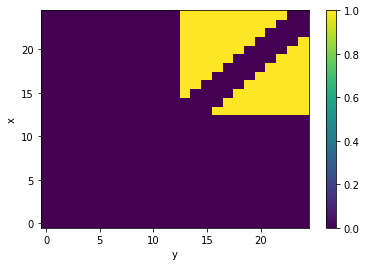

In [33]:
from xarrayutils.utils import sign_agreement

sign_agreement(da, da.mean('member'), 'member', threshold=1.0).plot()

You could use this information to indicate the areas of the average, where the members do not agree by hatching:

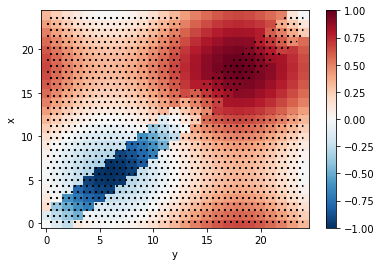

In [34]:
da.mean('member').plot()
sign_agreement(
    da, da.mean('member'), 'member'
).plot.contourf(
    colors='none',
    hatches=['..', None],
    levels=[0,0.5],
    add_colorbar=False
)

## Masking values in the mixed layer

Sometimes it is helpful to analyze data by excluding the values in the mixed layer. This can be easily done with `mask_mixedlayer`. Let's see how:

First load a CMIP6 dataset from the cloud

In [14]:
import intake
url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(url)
cat = col.search(
    table_id='Omon',
    grid_label='gn',
    experiment_id='historical',
    member_id='r1i1p1f1',
    variable_id=['thetao','mlotst'],#, 
    source_id=["ACCESS-ESM1-5"]
)
ddict = cat.to_dataset_dict(
    zarr_kwargs={'consolidated':True, 'decode_times':True},
)

/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [15]:
ds = ddict['CMIP.CSIRO.ACCESS-ESM1-5.historical.Omon.gn']
ds

<xarray.Dataset>
Dimensions:    (i: 360, j: 300, lev: 50, member_id: 1, time: 1980)
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
    latitude   (j, i) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude  (j, i) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
  * lev        (lev) float64 5.0 15.0 25.0 ... 5.166e+03 5.499e+03 5.831e+03
Data variables:
    mlotst     (member_id, time, j, i) float32 dask.array<chunksize=(1, 196, 300, 360), meta=np.ndarray>
    thetao     (member_id, time, lev, j, i) float32 dask.array<chunksize=(1, 5, 50, 300, 360), meta=np.ndarray>
Attributes:
    branch_time_in_parent:   21915.0
    nominal_resolution:      250 km
    physics_index:           1
    table_id:                Omon
    institution_id:          CSIRO
    parent_mip_era:          CMIP6
    sub_experiment_id:       none
    grid:                    native atmosphere N96 grid (145x192 latxlon)
    mip_era:                 CMIP6
    intake_esm_varname:      mlotst\nthetao
    activity_id:             CMIP
    title:                   ACCESS-ESM1-5 output prepared for CMIP6
    parent_source_id:        ACCESS-ESM1-5
    variant_label:           r1i1p1f1
    branch_method:           standard
    frequency:               mon
    run_variant:             forcing: GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2...
    tracking_id:             hdl:21.14100/4ca9ce2d-6374-4e22-8ad3-1a5a6dfb8fd...
    realm:                   ocean
    source_id:               ACCESS-ESM1-5
    forcing_index:           1
    parent_variant_label:    r1i1p1f1
    cmor_version:            3.4.0
    sub_experiment:          none
    parent_experiment_id:    piControl
    product:                 model-output
    license:                 CMIP6 model data produced by CSIRO is licensed u...
    branch_time_in_child:    0.0
    initialization_index:    1
    source:                  ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\...
    version:                 v20191115
    table_info:              Creation Date:(30 April 2019) MD5:e14f55f257ccea...
    history:                 2019-11-15T15:38:06Z ; CMOR rewrote data to be c...
    Conventions:             CF-1.7 CMIP-6.2
    realization_index:       1
    source_type:             AOGCM
    institution:             Commonwealth Scientific and Industrial Research ...
    experiment:              all-forcing simulation of the recent past
    parent_time_units:       days since 0101-1-1
    grid_label:              gn
    experiment_id:           historical
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACCES...
    parent_activity_id:      CMIP
    data_specs_version:      01.00.30
    intake_esm_dataset_key:  CMIP.CSIRO.ACCESS-ESM1-5.historical.Omon.gn

We can remove the values in the mixed layer

In [16]:
from xarrayutils.utils import mask_mixedlayer
ds_wo_ml = mask_mixedlayer(ds, ds.mlotst)
ds_wo_ml

/Users/juliusbusecke/code/xarrayutils/xarrayutils/utils.py:805: UserWarning: Cell bounds [{z_bounds}] not found in input. Masking is performed with cell centers, which might be less accurate
  warnings.warn(


<xarray.Dataset>
Dimensions:    (i: 360, j: 300, lev: 50, member_id: 1, time: 1980)
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
    latitude   (j, i) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude  (j, i) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
  * lev        (lev) float64 5.0 15.0 25.0 ... 5.166e+03 5.499e+03 5.831e+03
Data variables:
    mlotst     (member_id, time, j, i, lev) float32 dask.array<chunksize=(1, 196, 300, 360, 50), meta=np.ndarray>
    thetao     (member_id, time, lev, j, i) float32 dask.array<chunksize=(1, 5, 50, 300, 360), meta=np.ndarray>
Attributes:
    branch_time_in_parent:                21915.0
    nominal_resolution:                   250 km
    physics_index:                        1
    table_id:                             Omon
    institution_id:                       CSIRO
    parent_mip_era:                       CMIP6
    sub_experiment_id:                    none
    grid:                                 native atmosphere N96 grid (145x192...
    mip_era:                              CMIP6
    intake_esm_varname:                   mlotst\nthetao
    activity_id:                          CMIP
    title:                                ACCESS-ESM1-5 output prepared for C...
    parent_source_id:                     ACCESS-ESM1-5
    variant_label:                        r1i1p1f1
    branch_method:                        standard
    frequency:                            mon
    run_variant:                          forcing: GHG, Oz, SA, Sl, Vl, BC, O...
    tracking_id:                          hdl:21.14100/4ca9ce2d-6374-4e22-8ad...
    realm:                                ocean
    source_id:                            ACCESS-ESM1-5
    forcing_index:                        1
    parent_variant_label:                 r1i1p1f1
    cmor_version:                         3.4.0
    sub_experiment:                       none
    parent_experiment_id:                 piControl
    product:                              model-output
    license:                              CMIP6 model data produced by CSIRO ...
    branch_time_in_child:                 0.0
    initialization_index:                 1
    source:                               ACCESS-ESM1.5 (2019): \naerosol: CL...
    version:                              v20191115
    table_info:                           Creation Date:(30 April 2019) MD5:e...
    history:                              2019-11-15T15:38:06Z ; CMOR rewrote...
    Conventions:                          CF-1.7 CMIP-6.2
    realization_index:                    1
    source_type:                          AOGCM
    institution:                          Commonwealth Scientific and Industr...
    experiment:                           all-forcing simulation of the recen...
    parent_time_units:                    days since 0101-1-1
    grid_label:                           gn
    experiment_id:                        historical
    further_info_url:                     https://furtherinfo.es-doc.org/CMIP...
    parent_activity_id:                   CMIP
    data_specs_version:                   01.00.30
    intake_esm_dataset_key:               CMIP.CSIRO.ACCESS-ESM1-5.historical...
    mixed_layer_values_removed_based_on:  lev

Or to have the mixed layer values only

In [24]:
from xarrayutils.utils import mask_mixedlayer
ds_ml_only = mask_mixedlayer(ds, ds.mlotst, mask='inside')
ds_ml_only

/Users/juliusbusecke/code/xarrayutils/xarrayutils/utils.py:805: UserWarning: Cell bounds [{z_bounds}] not found in input. Masking is performed with cell centers, which might be less accurate
  warnings.warn(


<xarray.Dataset>
Dimensions:    (i: 360, j: 300, lev: 50, member_id: 1, time: 1980)
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
    latitude   (j, i) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude  (j, i) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
  * lev        (lev) float64 5.0 15.0 25.0 ... 5.166e+03 5.499e+03 5.831e+03
Data variables:
    mlotst     (member_id, time, j, i, lev) float32 dask.array<chunksize=(1, 196, 300, 360, 50), meta=np.ndarray>
    thetao     (member_id, time, lev, j, i) float32 dask.array<chunksize=(1, 5, 50, 300, 360), meta=np.ndarray>
Attributes:
    branch_time_in_parent:                21915.0
    nominal_resolution:                   250 km
    physics_index:                        1
    table_id:                             Omon
    institution_id:                       CSIRO
    parent_mip_era:                       CMIP6
    sub_experiment_id:                    none
    grid:                                 native atmosphere N96 grid (145x192...
    mip_era:                              CMIP6
    intake_esm_varname:                   mlotst\nthetao
    activity_id:                          CMIP
    title:                                ACCESS-ESM1-5 output prepared for C...
    parent_source_id:                     ACCESS-ESM1-5
    variant_label:                        r1i1p1f1
    branch_method:                        standard
    frequency:                            mon
    run_variant:                          forcing: GHG, Oz, SA, Sl, Vl, BC, O...
    tracking_id:                          hdl:21.14100/4ca9ce2d-6374-4e22-8ad...
    realm:                                ocean
    source_id:                            ACCESS-ESM1-5
    forcing_index:                        1
    parent_variant_label:                 r1i1p1f1
    cmor_version:                         3.4.0
    sub_experiment:                       none
    parent_experiment_id:                 piControl
    product:                              model-output
    license:                              CMIP6 model data produced by CSIRO ...
    branch_time_in_child:                 0.0
    initialization_index:                 1
    source:                               ACCESS-ESM1.5 (2019): \naerosol: CL...
    version:                              v20191115
    table_info:                           Creation Date:(30 April 2019) MD5:e...
    history:                              2019-11-15T15:38:06Z ; CMOR rewrote...
    Conventions:                          CF-1.7 CMIP-6.2
    realization_index:                    1
    source_type:                          AOGCM
    institution:                          Commonwealth Scientific and Industr...
    experiment:                           all-forcing simulation of the recen...
    parent_time_units:                    days since 0101-1-1
    grid_label:                           gn
    experiment_id:                        historical
    further_info_url:                     https://furtherinfo.es-doc.org/CMIP...
    parent_activity_id:                   CMIP
    data_specs_version:                   01.00.30
    intake_esm_dataset_key:               CMIP.CSIRO.ACCESS-ESM1-5.historical...
    mixed_layer_values_removed_based_on:  lev

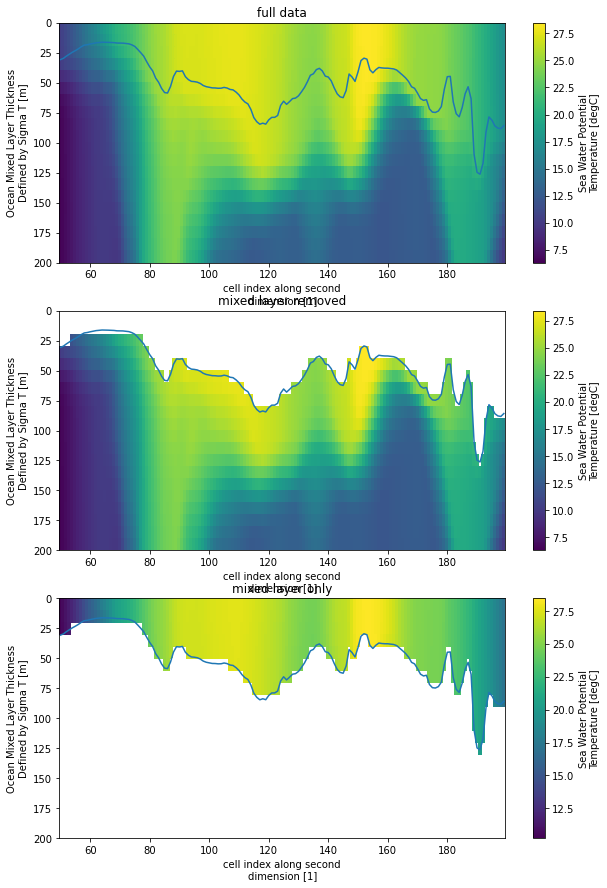

In [33]:
import matplotlib.pyplot as plt
roi = dict(i=150, time=0, j=slice(50, 200))
plt.figure(figsize=[10, 15])
for di, (data, label) in enumerate(zip([ds, ds_wo_ml, ds_ml_only], ['full data', 'mixed layer removed', 'mixed layer only'])):
    plt.subplot(3,1,di+1)
    data.thetao.isel(lev=slice(0,20),**roi).plot(yincrease=False)
    ds.mlotst.isel(**roi).plot(x='j')
    plt.title(label)

In this case the cell bounds are not available for the model output, but `mask_mixedlayer` has the option to take those into account and e.g. remove cells only if the lower boundary is within the mixed layer. All you need to do is correctly specify `z_bounds` with the variable/coordinate name of the cell bounds.